In [157]:
import pandas as pd
import os
import numpy as np
from citipy import citipy
from config import api_key
import requests
import json
import matplotlib.pyplot as plt

In [158]:
min_lat = (-90)
max_lat = (90)
min_lon = (-180)
max_lon = (180)

In [159]:
latitudes = []
longitudes = []

for lats in np.random.randint(min_lat,max_lat,2000):
    latitudes.append(lats)
for lons in np.random.randint(min_lon,max_lon,2000):
    longitudes.append(lons)

In [160]:
cities_table = pd.DataFrame()
cities_table['Latitude']  = latitudes
cities_table['Longitude']  = longitudes

In [161]:
locations = cities_table.to_records(index=False)
cities_tuple = list(locations)

In [162]:
#find nearest cities to all latitudes and longitudes using citipy
cities = []
country = []

for lat,lon in cities_tuple:
    city = citipy.nearest_city(lat,lon)
    CityNames = city.city_name
    cities.append(CityNames)
    country.append(city.country_code)

In [163]:
data = pd.DataFrame({'Cities': cities,'Country': country})

In [164]:
len(pd.unique(data['Cities']))

750

In [165]:
data = data.drop_duplicates(subset=['Cities'],keep='first')

In [166]:
data['Latitude'] = ''
data['Longitude'] = ''
data['Temperature (F)'] = ''
data['Humidity (%)'] = ''
data['Cloudiness (%)'] = ''
data['Wind Speed (mph)'] =''

In [167]:
for index,row in data.iterrows():
    city_api = row['Cities']
    country_api = row['Country']
    api_url = "http://api.openweathermap.org/data/2.5/weather" \
    "?q={},{}&units=imperial&mode=json&APPID={}".format(city_api,country_api,api_key)
    
    country_city = requests.get(api_url).json()
    print(api_url)    
    
    try:
        data.at[index,'Latitude'] = (country_city['coord']['lat'])
        data.at[index,'Longitude'] = (country_city['coord']['lon'])
        data.at[index,'Temperature (F)'] = (country_city['main']['temp'])
        data.at[index,'Humidity (%)'] = (country_city['main']['humidity'])
        data.at[index,'Cloudiness (%)'] = (country_city['clouds']['all'])
        data.at[index,'Wind Speed (mph)'] = (country_city['wind']['speed'])
        
    except KeyError:
        data.at[index,'Latitude'] = (np.nan)
        data.at[index,'Longitude'] = (np.nan)
        data.at[index,'Temperature (F)'] = (np.nan)
        data.at[index,'Humidity (%)'] = (np.nan)
        data.at[index,'Cloudiness (%)'] = (np.nan)
        data.at[index,'Wind Speed (mph)'] = (np.nan)
        
        print('Weather information is not available...next')


http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=manica,mz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=karaul,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,cv&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=azuaga,es&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sembe,cg&units=imperial&mode

http://api.openweathermap.org/data/2.5/weather?q=jalingo,ng&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hervey bay,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=aljezur,pt&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=garden city,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cap-aux-meules,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c76

http://api.openweathermap.org/data/2.5/weather?q=camacupa,ao&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=malwan,in&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=port pirie,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=sao gabriel da cachoeira,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=toritama,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed,pw&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=dong hoi,vn&uni

http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=egvekinot,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kushmurun,kz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=tzucacab,mx&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=wanaka,nz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bonnyville,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837fa

http://api.openweathermap.org/data/2.5/weather?q=iskateley,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=nishihara,jp&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=uusikaupunki,fi&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=camacha,pt&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=arlit,ne&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837f

http://api.openweathermap.org/data/2.5/weather?q=snyder,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=moerai,pf&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cochrane,ca&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=linqiong,cn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=barnbach,at&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bontang,id&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://ap

http://api.openweathermap.org/data/2.5/weather?q=pochutla,mx&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=frontera,mx&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kandrian,pg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=san lawrenz,mt&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=quincy,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=koutsouras,gr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=bulembu,sz&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=samalaeulu,ws&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837

http://api.openweathermap.org/data/2.5/weather?q=tabuk,sa&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=guane,cu&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=kenai,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=santa rosa,bo&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=hovd,mn&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=warri,ng&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=laurel,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=avenal,us&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre,pm&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=teahupoo,pf&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=gaspar,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=boa vista,br&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=matay,eg&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=paka,my&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=srivardhan,in&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf


http://api.openweathermap.org/data/2.5/weather?q=challans,fr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=gornopravdinsk,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=alice springs,au&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cabras,it&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=zagreb,hr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=naruja,ge&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=manosque,fr&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=mahaicony,gy&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c76668

http://api.openweathermap.org/data/2.5/weather?q=puerto escondido,mx&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=cap-haitien,ht&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=shkotovo-22,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=gilazi,az&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
http://api.openweathermap.org/data/2.5/weather?q=chagda,ru&units=imperial&mode=json&APPID=6d43b3aa7c58652263c46c7666837faf
Weather information is not available...next
http://api.openweathermap.org/data/2.5/weather?q=lodja,cd&units=imperial&mode=json&APPID=6d43b3aa7c58652263c4

In [168]:
data.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ushuaia,ar,-54.8,-68.3,38.86,81,40,23.02
1,punta arenas,cl,-53.15,-70.9167,39.31,81,20,33.38
2,avarua,ck,-21.2078,-159.775,80.65,74,90,12.66
3,illoqqortoormiut,gl,NaN,NaN,NaN,NaN,NaN,NaN
4,amderma,ru,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
data_dropna = (data.dropna())

In [170]:
data_dropna.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ushuaia,ar,-54.8,-68.3,38.86,81,40,23.02
1,punta arenas,cl,-53.15,-70.9167,39.31,81,20,33.38
2,avarua,ck,-21.2078,-159.775,80.65,74,90,12.66
5,kapaa,us,22.0752,-159.319,83.16,77,20,5.01
6,alofi,nu,-19.0595,-169.919,78.69,65,75,12.66


In [171]:
len(data_dropna)

670

In [172]:
data_dropna.dtypes

Cities              object
Country             object
Latitude            object
Longitude           object
Temperature (F)     object
Humidity (%)        object
Cloudiness (%)      object
Wind Speed (mph)    object
dtype: object

In [173]:
data_dropna['Latitude'] = pd.to_numeric(data_dropna['Latitude'])
data_dropna['Longitude'] = pd.to_numeric(data_dropna['Longitude'])
data_dropna['Temperature (F)'] = pd.to_numeric(data_dropna['Temperature (F)'])
data_dropna['Humidity (%)'] = pd.to_numeric(data_dropna['Humidity (%)'])
data_dropna['Cloudiness (%)'] = pd.to_numeric(data_dropna['Cloudiness (%)'])
data_dropna['Wind Speed (mph)'] = pd.to_numeric(data_dropna['Wind Speed (mph)'])

<ipython-input-173-d68f9622be91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna['Latitude'] = pd.to_numeric(data_dropna['Latitude'])
<ipython-input-173-d68f9622be91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna['Longitude'] = pd.to_numeric(data_dropna['Longitude'])
<ipython-input-173-d68f9622be91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [255]:
southern_temp = data_dropna[data_dropna['Latitude'] < 0]
northern_temp = data_dropna[data_dropna['Latitude'] > 0]

<AxesSubplot:xlabel='Temperature (F)', ylabel='Latitude'>

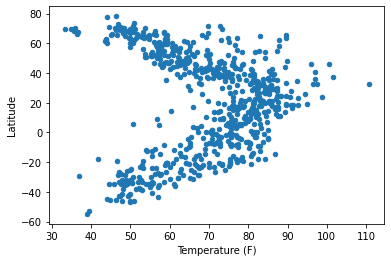

In [256]:
data_dropna.plot.scatter(x='Temperature (F)', y='Latitude')

<AxesSubplot:xlabel='Humidity (%)', ylabel='Latitude'>

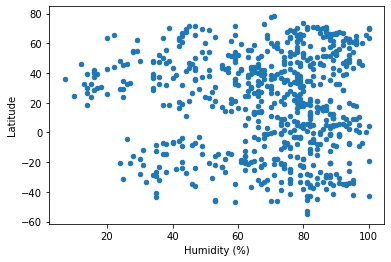

In [257]:
data_dropna.plot.scatter(x='Humidity (%)', y='Latitude')

<AxesSubplot:xlabel='Cloudiness (%)', ylabel='Latitude'>

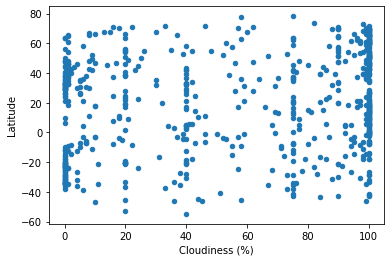

In [258]:
data_dropna.plot.scatter(x='Cloudiness (%)', y='Latitude')

<AxesSubplot:xlabel='Wind Speed (mph)', ylabel='Latitude'>

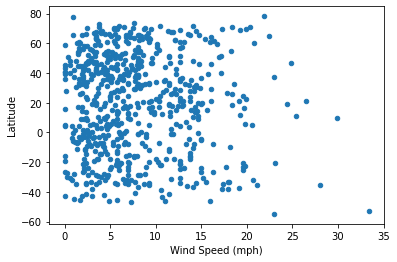

In [259]:
data_dropna.plot.scatter(x='Wind Speed (mph)', y='Latitude')

The r-squared is: 0.4032546702630878


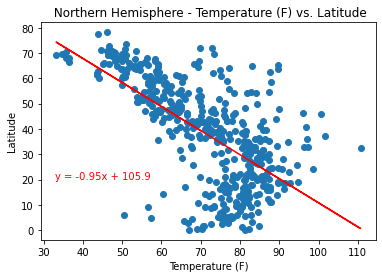

In [268]:
from scipy.stats import linregress
north_temp_regress_val = (northern_temp.iloc[:,4])
north_lat_regress_val = (northern_temp.iloc[:,2])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_regress_val, north_lat_regress_val)
regress_values = north_temp_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_temp_regress_val,north_lat_regress_val)
plt.plot(north_temp_regress_val,regress_values,"r-")
plt.annotate(line_eq,(33,20),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00286852527024348


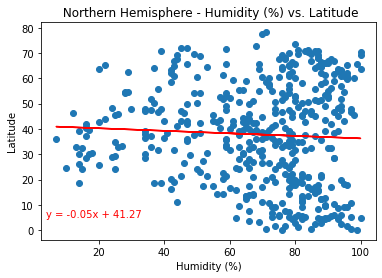

In [288]:
north_hum_regress_val = (northern_temp.iloc[:,5])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hum_regress_val, north_lat_regress_val)
regress_values = north_hum_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hum_regress_val,north_lat_regress_val)
plt.plot(north_hum_regress_val,regress_values,"r-")
plt.annotate(line_eq,(4,5),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0004688662851723737


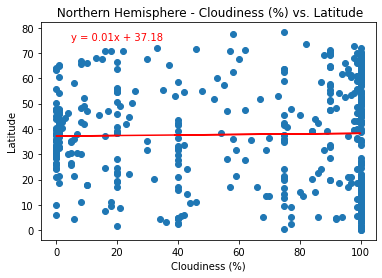

In [274]:
north_cloud_regress_val = (northern_temp.iloc[:,6])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloud_regress_val, north_lat_regress_val)
regress_values = north_cloud_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cloud_regress_val,north_lat_regress_val)
plt.plot(north_cloud_regress_val,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0005860496192714249


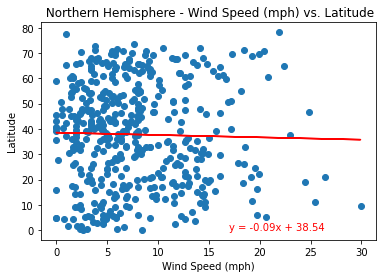

In [279]:
#nothern_temp.plot.scatter(x='Wind Speed (mph)', y='Latitude')
north_wind_regress_val = (northern_temp.iloc[:,7])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_regress_val, north_lat_regress_val)
regress_values = north_wind_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_wind_regress_val,north_lat_regress_val)
plt.plot(north_wind_regress_val,regress_values,"r-")
plt.annotate(line_eq,(17,0),fontsize=10,color="red")
plt.title(" Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.590307841158904


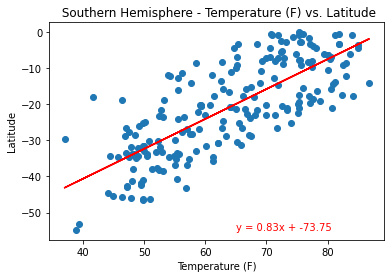

In [287]:
#southern_temp.plot.scatter(x='Temperature (F)', y='Latitude')
south_temp_regress_val = (southern_temp.iloc[:,4])
south_lat_regress_val = (southern_temp.iloc[:,2])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_regress_val, south_lat_regress_val)
regress_values = south_temp_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_temp_regress_val,south_lat_regress_val)
plt.plot(south_temp_regress_val,regress_values,"r-")
plt.annotate(line_eq,(65,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003074727769345589


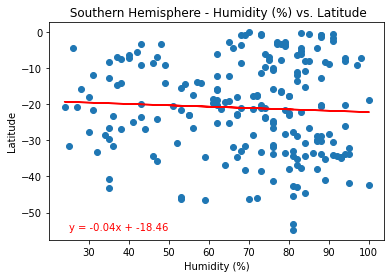

In [292]:
#southern_temp.plot.scatter(x='Humidity (%)', y='Latitude')
south_hum_regress_val = (southern_temp.iloc[:,5])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hum_regress_val, south_lat_regress_val)
regress_values = south_hum_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hum_regress_val,south_lat_regress_val)
plt.plot(south_hum_regress_val,regress_values,"r-")
plt.annotate(line_eq,(25,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03180971767661648


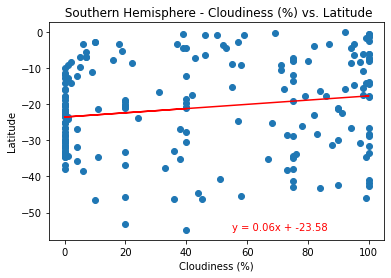

In [295]:
#southern_temp.plot.scatter(x='Cloudiness (%)', y='Latitude')
south_cloud_regress_val = (southern_temp.iloc[:,6])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloud_regress_val, south_lat_regress_val)
regress_values = south_cloud_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cloud_regress_val,south_lat_regress_val)
plt.plot(south_cloud_regress_val,regress_values,"r-")
plt.annotate(line_eq,(55,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05143181604480685


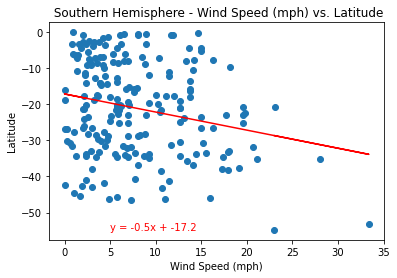

In [298]:
#southern_temp.plot.scatter(x='Wind Speed (mph)', y='Latitude')
south_wind_regress_val = (southern_temp.iloc[:,7])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_regress_val, south_lat_regress_val)
regress_values = south_wind_regress_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_wind_regress_val,south_lat_regress_val)
plt.plot(south_wind_regress_val,regress_values,"r-")
plt.annotate(line_eq,(5,-55),fontsize=10,color="red")
plt.title(" Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()